In [1]:
# To bring in the libraries
import pandas as pd
import numpy as np

In [2]:
# To bring in the dataset
df = pd.read_excel(r"C:\Users\user\Desktop\short-format.xlsx", header = 3)

In [3]:
df.head(6)

,Country ISO-3 Code,Country Short Name,Year period,Median Year,Start Month,End Month,WHO Reference number,Representation level,Region,Other group/Zone,...,Severe wasting,Wasting,Overweight,Stunting,Underweight,Short Source Code,Reference Title,Author,Notes,JME (Y/N)
0,AFG,Afghanistan,2022-2023,2022,SEP,FEB,10055,NaN,NaN,NaN,...,1.20261,3.63299,4.50092,44.60430,18.35824,MICS,Afghanistan Multiple Indicator Cluster Survey ...,UNICEF,NaN,Selected for JME
1,AFG,Afghanistan,2022-2023,2022,SEP,FEB,10055,NaN,NaN,NaN,...,2.52439,6.25841,14.13189,26.19436,14.19366,MICS,Afghanistan Multiple Indicator Cluster Survey ...,UNICEF,NaN,Not selected for JME
2,AFG,Afghanistan,2022-2023,2022,SEP,FEB,10055,NaN,NaN,NaN,...,1.97696,6.63969,4.74012,24.18722,14.68663,MICS,Afghanistan Multiple Indicator Cluster Survey ...,UNICEF,NaN,Not selected for JME
3,AFG,Afghanistan,2022-2023,2022,SEP,FEB,10055,NaN,NaN,NaN,...,1.33964,4.81251,3.29225,41.13941,17.18858,MICS,Afghanistan Multiple Indicator Cluster Survey ...,UNICEF,NaN,Not selected for JME
4,AFG,Afghanistan,2022-2023,2022,SEP,FEB,10055,NaN,NaN,NaN,...,0.94883,2.98044,3.45675,54.68480,21.04723,MICS,Afghanistan Multiple Indicator Cluster Survey ...,UNICEF,NaN,Not selected for JME
5,AFG,Afghanistan,2022-2023,2022,SEP,FEB,10055,NaN,NaN,NaN,...,0.70962,1.92516,3.83220,54.23912,20.22084,MICS,Afghanistan Multiple Indicator Cluster Survey ...,UNICEF,NaN,Not selected for JME


In [4]:
# To see the shape:
df.shape

(40631, 26)

In [5]:
# To cheeck genral info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40631 entries, 0 to 40630
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country ISO-3 Code    40631 non-null  object 
 1   Country Short Name    40631 non-null  object 
 2   Year period           40631 non-null  object 
 3   Median Year           40631 non-null  int64  
 4   Start Month           38562 non-null  object 
 5   End Month             38497 non-null  object 
 6   WHO Reference number  40631 non-null  int64  
 7   Representation level  1618 non-null   object 
 8   Region                10667 non-null  object 
 9   Other group/Zone      31 non-null     object 
 10  Age                   40631 non-null  object 
 11  Sex                   40631 non-null  object 
 12  Mother education      1353 non-null   object 
 13  Wealth quintile       3269 non-null   object 
 14  Urban/Rural           40631 non-null  object 
 15  Sample size        

In [6]:
# To check for missing values in absolute terms in the dataset
missing = df.isnull().sum()
missing = missing[missing > 0]
missing

Start Month              2069
End Month                2134
Representation level    39013
Region                  29964
Other group/Zone        40600
Mother education        39278
Wealth quintile         37362
Sample size              4902
Severe wasting           2013
Wasting                  1438
Overweight               2015
Stunting                 1372
Underweight               993
Notes                   25243
dtype: int64

In [7]:
# To display the missing values in the dataset by percentages in the order of highest to lowest
pd.DataFrame(data = {"% of Missing Values": round(df.isnull().sum()/df.isnull().count()*100,2)}).sort_values(by = "% of Missing Values", ascending = False)

,% of Missing Values
Other group/Zone,99.92
Mother education,96.67
Representation level,96.02
Wealth quintile,91.95
Region,73.75
Notes,62.13
Sample size,12.06
End Month,5.25
Start Month,5.09
Overweight,4.96


In [8]:
# To get the categorial columns
cat_col = [col for col in df.columns if df[col].dtypes == 'O']
print(cat_col)

['Country ISO-3 Code', 'Country Short Name', 'Year period', 'Start Month', 'End Month', 'Representation level', 'Region', 'Other group/Zone', 'Age', 'Sex', 'Mother education', 'Wealth quintile', 'Urban/Rural', 'Short Source Code', 'Reference Title', 'Author', 'Notes', 'JME (Y/N)']


In [9]:
# To get the numerical columns
num_col = [col for col in df.columns if df[col].dtypes != 'O']
print(num_col)

['Median Year', 'WHO Reference number', 'Sample size', 'Severe wasting', 'Wasting', 'Overweight', 'Stunting', 'Underweight']


In [10]:
# To get the number of unique values in each column
for col in df.columns:
    values = df[col].nunique()
    print(f'{col}:{values}')

Country ISO-3 Code:169
Country Short Name:169
Year period:136
Median Year:57
Start Month:25
End Month:12
WHO Reference number:1258
Representation level:6
Region:2749
Other group/Zone:4
Age:40
Sex:3
Mother education:3
Wealth quintile:7
Urban/Rural:3
Sample size:6167
Severe wasting:29966
Wasting:33156
Overweight:33393
Stunting:34874
Underweight:34476
Short Source Code:21
Reference Title:1239
Author:928
Notes:238
JME (Y/N):2


In [11]:
# To obatin the unique values contained in the different columns in the dataset
for col in df.columns:
    values = df[col].unique()
    print(f'{col}:{values}')

Country ISO-3 Code:['AFG' 'AGO' 'ALB' 'ARG' 'ARM' 'ATG' 'AUS' 'AZE' 'BDI' 'BEL' 'BEN' 'BFA'
 'BGD' 'BGR' 'BHR' 'BIH' 'BLR' 'BLZ' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA'
 'CAF' 'CAN' 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI'
 'CUB' 'CZE' 'DEU' 'DJI' 'DMA' 'DOM' 'DZA' 'ECU' 'EGY' 'ERI' 'ESP' 'EST'
 'ETH' 'FJI' 'GAB' 'GBR' 'GEO' 'GHA' 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC' 'GTM'
 'GUY' 'HND' 'HRV' 'HTI' 'HUN' 'IDN' 'IND' 'IRN' 'IRQ' 'ITA' 'JAM' 'JOR'
 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KOR' 'KWT' 'LAO' 'LBN' 'LBR' 'LBY'
 'LCA' 'LKA' 'LSO' 'LTU' 'LVA' 'MAR' 'MDA' 'MDG' 'MDV' 'MEX' 'MHL' 'MKD'
 'MLI' 'MMR' 'MNE' 'MNG' 'MOZ' 'MRT' 'MUS' 'MWI' 'MYS' 'NAM' 'NER' 'NGA'
 'NIC' 'NLD' 'NPL' 'NRU' 'OMN' 'PAK' 'PAN' 'PER' 'PHL' 'PNG' 'POL' 'PRK'
 'PRT' 'PRY' 'PSE' 'QAT' 'ROU' 'RUS' 'RWA' 'SAU' 'SDN' 'SEN' 'SGP' 'SLB'
 'SLE' 'SLV' 'SOM' 'SRB' 'SSD' 'STP' 'SUR' 'SWE' 'SWZ' 'SYC' 'SYR' 'TCA'
 'TCD' 'TGO' 'THA' 'TJK' 'TKM' 'TLS' 'TON' 'TTO' 'TUN' 'TUR' 'TUV' 'TZA'
 'UGA' 'UKR' 'URY' 'USA' 'UZB' '

In [12]:
# To check for duplicates 
df.duplicated().sum()

0

In [13]:
# To get a sample of the dataset in a bid to have a sense of the cleaning work required
df.sample(10).T

,13407,31672,11605,14412,14621,39036,32869,20256,11464,31944
Country ISO-3 Code,IDN,SGP,GRC,IRN,IRQ,VNM,SUR,MDG,GNB,SLE
Country Short Name,Indonesia,Singapore,Greece,Iran (Islamic Republic of),Iraq,Viet Nam,Suriname,Madagascar,Guinea-Bissau,Sierra Leone
Year period,2007,1970-1977,2003-2004,2017,2000,2020,2006,1997,2000,2014
Median Year,2007,1974,2003,2017,2000,2020,2006,1997,2000,2014
Start Month,AUG,NaN,JUL,SEP,NOV,NaN,APR,SEP,APR,JUN
End Month,AUG,NaN,MAY,NOV,DEC,NaN,JUN,DEC,MAY,AUG
WHO Reference number,2916,319,2727,5183,2414,9718,3040,1864,2358,3521
Representation level,NaN,NU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,NaN,NaN,NaN,Qazvin,NaN,Hai Phòng,NaN,Antananarivo,NaN,West-rural
Other group/Zone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observations after review of the dataset: 
##### The column headers not in uniofrm format
##### Missing value are present. To be treated as necessary
##### Some columns do not have any real impact on the task and as such will be dropped

In [14]:
# No.1
# Correcting the column headers 
df.columns = df.columns.str.upper()

In [15]:
# To check operation 
df.head(6).T

,0,1,2,3,4,5
COUNTRY ISO-3 CODE,AFG,AFG,AFG,AFG,AFG,AFG
COUNTRY SHORT NAME,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
YEAR PERIOD,2022-2023,2022-2023,2022-2023,2022-2023,2022-2023,2022-2023
MEDIAN YEAR,2022,2022,2022,2022,2022,2022
START MONTH,SEP,SEP,SEP,SEP,SEP,SEP
END MONTH,FEB,FEB,FEB,FEB,FEB,FEB
WHO REFERENCE NUMBER,10055,10055,10055,10055,10055,10055
REPRESENTATION LEVEL,NaN,NaN,NaN,NaN,NaN,NaN
REGION,NaN,NaN,NaN,NaN,NaN,NaN
OTHER GROUP/ZONE,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# No.2 
# With reference to the missing values in pct, the following columns will be dropped, off the bat:
# Other Grop/Zone accounts for 99.9% 
# Mother Education accounts for 96.6%
# Represntation level accounts for 96%
# Wealth Quintile accounts for 91.9%
# Retainng them will not produce relaible infomation given the fact that by standard practice once a column has more than 80% of values missing is best to knock it off

# While the following columns will be dropped as these columns do not neccessarily play any role:
# Country ISO 3 Code  
# WHO Reference Number
# Reference Title     
# Year Period    

In [17]:
# Dropping accordingly
df.drop(columns = ['OTHER GROUP/ZONE', 'MOTHER EDUCATION', 'REPRESENTATION LEVEL', 'WEALTH QUINTILE', 'COUNTRY ISO-3 CODE','WHO REFERENCE NUMBER','REFERENCE TITLE', 'YEAR PERIOD'], axis = 1, inplace = True)
# Confirm operation
df

,COUNTRY SHORT NAME,MEDIAN YEAR,START MONTH,END MONTH,REGION,AGE,SEX,URBAN/RURAL,SAMPLE SIZE,SEVERE WASTING,WASTING,OVERWEIGHT,STUNTING,UNDERWEIGHT,SHORT SOURCE CODE,AUTHOR,NOTES,JME (Y/N)
0,Afghanistan,2022,SEP,FEB,NaN,0. - 4.99,BTSX,BOTH,32303.0,1.20261,3.63299,4.50092,44.60430,18.35824,MICS,UNICEF,NaN,Selected for JME
1,Afghanistan,2022,SEP,FEB,NaN,0. - 0.49,BTSX,BOTH,3178.0,2.52439,6.25841,14.13189,26.19436,14.19366,MICS,UNICEF,NaN,Not selected for JME
2,Afghanistan,2022,SEP,FEB,NaN,0.50 - 0.99,BTSX,BOTH,3123.0,1.97696,6.63969,4.74012,24.18722,14.68663,MICS,UNICEF,NaN,Not selected for JME
3,Afghanistan,2022,SEP,FEB,NaN,1. - 1.99,BTSX,BOTH,6072.0,1.33964,4.81251,3.29225,41.13941,17.18858,MICS,UNICEF,NaN,Not selected for JME
4,Afghanistan,2022,SEP,FEB,NaN,2. - 2.99,BTSX,BOTH,6230.0,0.94883,2.98044,3.45675,54.68480,21.04723,MICS,UNICEF,NaN,Not selected for JME
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40626,Zimbabwe,2009,APR,MAY,Mashonaland West,0. - 4.99,BTSX,BOTH,711.0,0.71698,4.31156,2.89300,34.96618,16.41821,MICS,Zimbabwe National Statistics Agency (ZIMSTAT).,Oedema not considered,Not selected for JME
40627,Zimbabwe,2009,APR,MAY,Masvingo,0. - 4.99,BTSX,BOTH,742.0,0.16778,2.13687,4.00260,37.78250,9.61627,MICS,Zimbabwe National Statistics Agency (ZIMSTAT).,Oedema not considered,Not selected for JME
40628,Zimbabwe,2009,APR,MAY,Matabeleland North,0. - 4.99,BTSX,BOTH,555.0,0.94397,4.47851,1.74471,32.95322,14.55011,MICS,Zimbabwe National Statistics Agency (ZIMSTAT).,Oedema not considered,Not selected for JME
40629,Zimbabwe,2009,APR,MAY,Matabeleland South,0. - 4.99,BTSX,BOTH,584.0,0.00000,1.57537,1.74470,28.37780,10.05157,MICS,Zimbabwe National Statistics Agency (ZIMSTAT).,Oedema not considered,Not selected for JME


In [18]:
# No.3
# To tidy the missing values in Region:
# Since is an object
df['REGION'].mode()[0]

'Dhaka'

In [19]:
# Dhaka is used to fill up the gaps in the column, Region
df['REGION'].fillna('Dhaka', inplace = True)

In [20]:
# To check operation:
df['REGION'].isnull().sum()

0

In [21]:
# Handling missing values in Notes
df['NOTES'].mode()[0]

'Height/length modality (standing/lying) was not collected'

In [22]:
# Dhaka is used to fill up the gaps in the column, Region
df['NOTES'].fillna('Height/length modality (standing/lying) was not collected', inplace = True)

In [23]:
# To check operation:
df['NOTES'].isnull().sum()

0

In [24]:
# Handling sample size NaN
df['SAMPLE SIZE'].median()

735.0

In [25]:
# 735 is used to fill up the gaps. median value is used to avoid outlier effects
df['SAMPLE SIZE'].fillna('735', inplace = True)

In [26]:
# To check operation:
df['SAMPLE SIZE'].isnull().sum()

0

In [27]:
# Handling Start Month missing Valus:
df['START MONTH'].mode()[0]

'SEP'

In [28]:
# SEP is used to fill up the gaps
df['START MONTH'].fillna('SEP', inplace = True)

In [29]:
# To check operation:
df['START MONTH'].isnull().sum()

0

In [30]:
# Handling End Month missing Valus:
df['END MONTH'].mode()[0]

'DEC'

In [31]:
# DEC is used to fill up the gaps
df['END MONTH'].fillna('DEC', inplace = True)

In [32]:
# To check operation:
df['END MONTH'].isnull().sum()

0

In [33]:
# Handling Overweight NaN
df['OVERWEIGHT'].median()

4.60067

In [34]:
# 4.60067 used to fill up the gaps
df['OVERWEIGHT'].fillna('4.60067', inplace = True)

In [35]:
# To check operation:
df['OVERWEIGHT'].isnull().sum()

0

In [36]:
# Handling Severe Wasting NaN
df['SEVERE WASTING'].median()

1.4212150000000001

In [37]:
# 1.4212150000000001 used to fill up the gaps
df['SEVERE WASTING'].fillna('1.4212150000000001', inplace = True)

In [38]:
# To check operation:
df['SEVERE WASTING'].isnull().sum()

0

In [39]:
# Handling Wasting NaN
df['WASTING'].median()

5.7

In [40]:
# 5.7 used to fill up the gaps
df['WASTING'].fillna('5.7', inplace = True)

In [41]:
# To check operation:
df['WASTING'].isnull().sum()

0

In [42]:
# Handling Stunting NaN
df['STUNTING'].median()

26.14111

In [43]:
# 5.7 used to fill up the gaps
df['STUNTING'].fillna('26.14111', inplace = True)

In [44]:
# To check operation:
df['STUNTING'].isnull().sum()

0

In [45]:
# Handling Under weight NaN
df['UNDERWEIGHT'].median()

13.316790000000001

In [46]:
# 13.316790000000001 used to fill up the gaps
df['UNDERWEIGHT'].fillna('13.316790000000001', inplace = True)

In [47]:
# To check operation:
df['UNDERWEIGHT'].isnull().sum()

0

In [48]:
# Having resolved the missing values, lets ensure there are no missing values in the dataset:
df.isnull().sum()

COUNTRY SHORT NAME    0
MEDIAN YEAR           0
START MONTH           0
END MONTH             0
REGION                0
AGE                   0
SEX                   0
URBAN/RURAL           0
SAMPLE SIZE           0
SEVERE WASTING        0
WASTING               0
OVERWEIGHT            0
STUNTING              0
UNDERWEIGHT           0
SHORT SOURCE CODE     0
AUTHOR                0
NOTES                 0
JME (Y/N)             0
dtype: int64

In [49]:
# Country Short name is renamed as Country
df.rename(columns = {'COUNTRY SHORT NAME':'COUNTRY'}, inplace = True)
# Confirm operation:
list(df.columns)

['COUNTRY',
 'MEDIAN YEAR',
 'START MONTH',
 'END MONTH',
 'REGION',
 'AGE',
 'SEX',
 'URBAN/RURAL',
 'SAMPLE SIZE',
 'SEVERE WASTING',
 'WASTING',
 'OVERWEIGHT',
 'STUNTING',
 'UNDERWEIGHT',
 'SHORT SOURCE CODE',
 'AUTHOR',
 'NOTES',
 'JME (Y/N)']

#### This section deals with EDA - Univariate Analysis

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# The float items that turned into objects to be resolved:
df['SAMPLE SIZE'] = df['SAMPLE SIZE'].astype(float)
df['SEVERE WASTING'] = df['SEVERE WASTING'].astype(float)
df['WASTING']= df['WASTING'].astype(float)
df['OVERWEIGHT'] = df['OVERWEIGHT'].astype(float)
df['STUNTING'] = df['STUNTING'].astype(float)
df['UNDERWEIGHT']= df['UNDERWEIGHT'].astype(float)

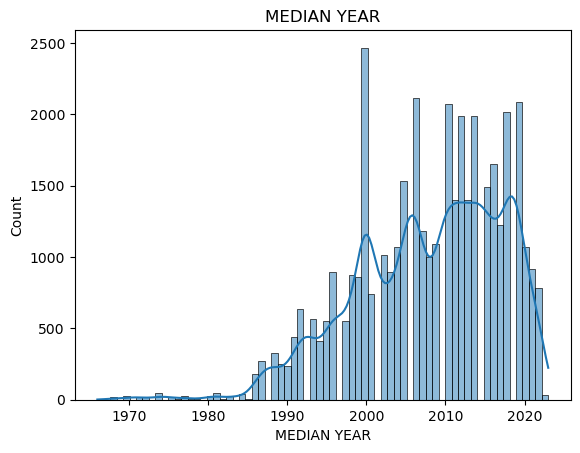

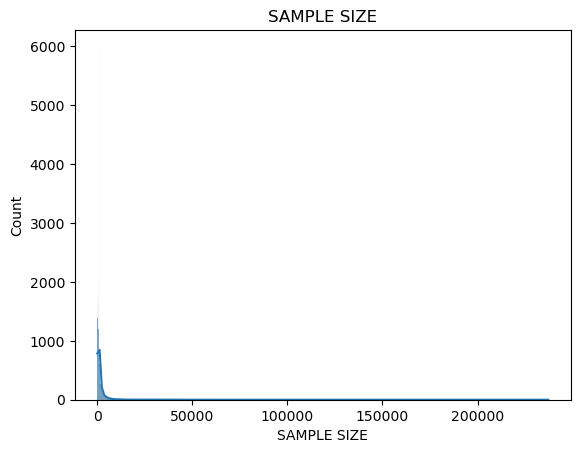

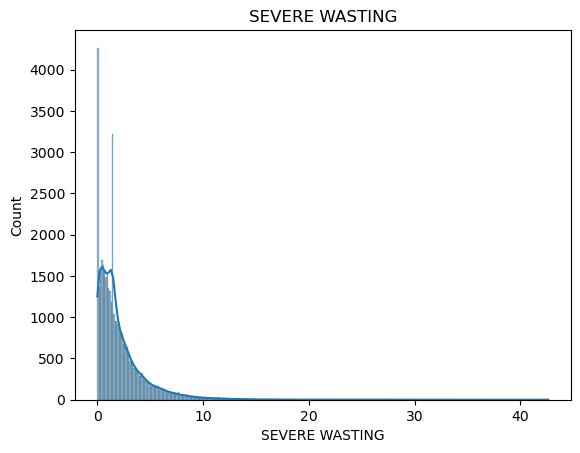

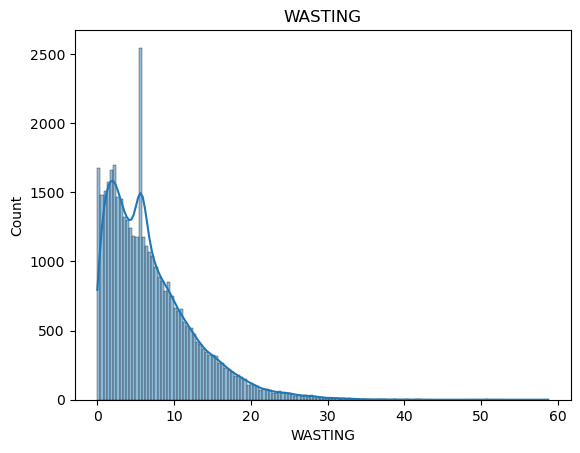

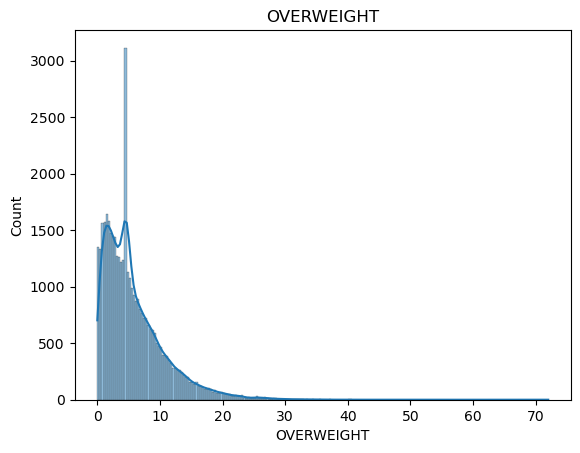

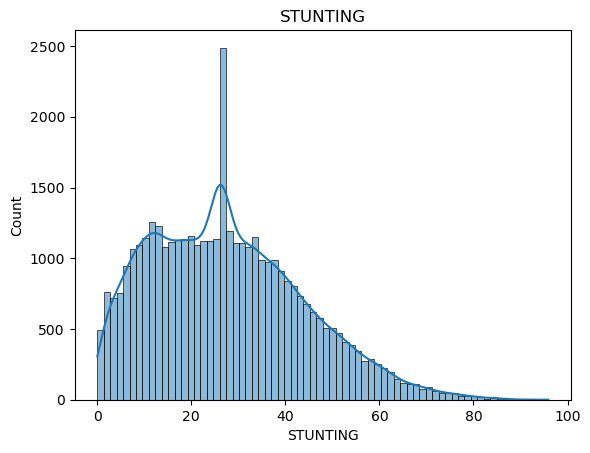

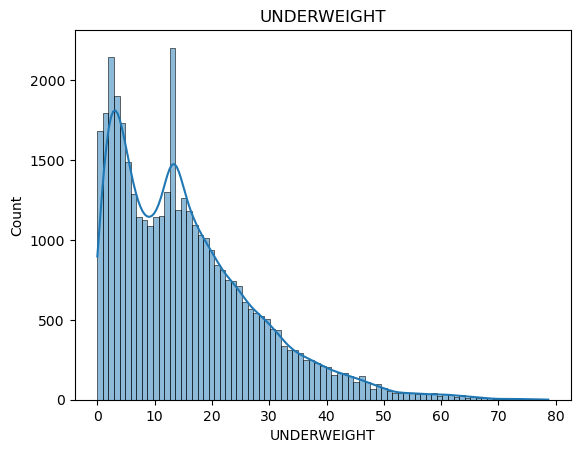

In [52]:
numeric_features = [numeric for numeric in df.columns if df[numeric].dtypes!='O']
for features in numeric_features:
        sns.histplot(df[features], kde = True)
        plt.title(features)
        plt.show()

In [ ]:
# For the categorical colunms, a univairate analysis is also done for some of them
# Countplot is adopted to better undersand the varibales.

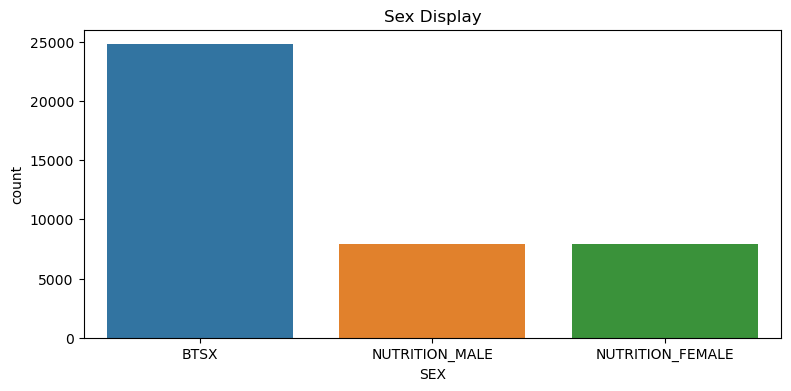

In [53]:
# For Sex  
plt.figure(figsize=(9, 4))
sns.countplot(x ='SEX', data = df)
plt.title('Sex Display')
plt.show()

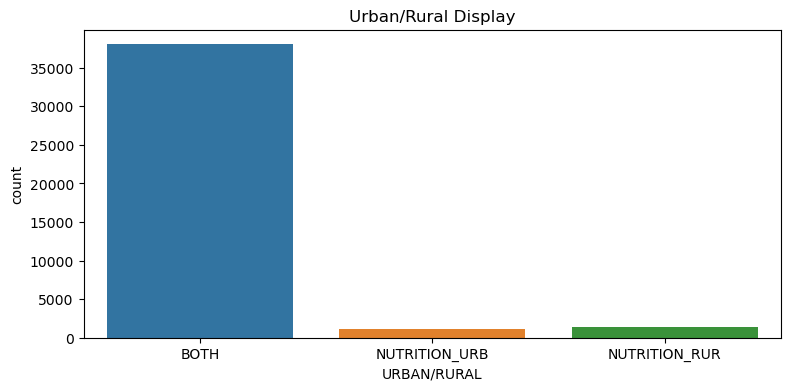

In [54]:
# For Urban/Rural
plt.figure(figsize=(9, 4))
sns.countplot(x ='URBAN/RURAL', data = df)
plt.title('Urban/Rural Display')
plt.show()

In [ ]:
# For Short Source Code
plt.figure(figsize=(27, 6))
sns.countplot(x ='SHORT SOURCE CODE', data = df)
plt.title('Code Display')
plt.show()

#### Section deals with Bivariate Analysis. The relationship between the input numerical variables and the target variable is examined. The statistical test used, is t-test,  while the Barplot is used to visualize.

In [59]:
# To bring in the stat library
from scipy import stats
import statistics as stat

In [61]:
# Separate data into two groups based on JME (Y/N)
group_Y = df[df['JME (Y/N)'] == 'Selected for JME']['SEVERE WASTING']
group_N = df[df['JME (Y/N)'] == 'Not selected for JME']['SEVERE WASTING']

In [62]:
# Perform independent samples t-test
t_stat, p_value = stats.ttest_ind(group_Y, group_N)

# Display results
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: -4.027029778443531
p-value: 5.6588398209283806e-05


In [63]:
# Separate data into two groups based on JME (Y/N)
group_Y = df[df['JME (Y/N)'] == 'Selected for JME']['WASTING']
group_N = df[df['JME (Y/N)'] == 'Not selected for JME']['WASTING']

# Perform independent samples t-test
t_stat, p_value = stats.ttest_ind(group_Y, group_N)

# Display results
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: -2.273825193475325
p-value: 0.022981691734347862


In [64]:
# Separate data into two groups based on JME (Y/N)
group_Y = df[df['JME (Y/N)'] == 'Selected for JME']['OVERWEIGHT']
group_N = df[df['JME (Y/N)'] == 'Not selected for JME']['OVERWEIGHT']

# Perform independent samples t-test
t_stat, p_value = stats.ttest_ind(group_Y, group_N)

# Display results
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: 0.5064671164623535
p-value: 0.6125315168324499


In [65]:
# Separate data into two groups based on JME (Y/N)
group_Y = df[df['JME (Y/N)'] == 'Selected for JME']['UNDERWEIGHT']
group_N = df[df['JME (Y/N)'] == 'Not selected for JME']['UNDERWEIGHT']

# Perform independent samples t-test
t_stat, p_value = stats.ttest_ind(group_Y, group_N)

# Display results
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: -1.2877361920921204
p-value: 0.19784514515019555


In [66]:
# Separate data into two groups based on JME (Y/N)
group_Y = df[df['JME (Y/N)'] == 'Selected for JME']['STUNTING']
group_N = df[df['JME (Y/N)'] == 'Not selected for JME']['STUNTING']

# Perform independent samples t-test
t_stat, p_value = stats.ttest_ind(group_Y, group_N)

# Display results
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: -0.19693719944865148
p-value: 0.8438776678219736


In [67]:
# Separate data into two groups based on JME (Y/N)
group_Y = df[df['JME (Y/N)'] == 'Selected for JME']['SAMPLE SIZE']
group_N = df[df['JME (Y/N)'] == 'Not selected for JME']['SAMPLE SIZE']

# Perform independent samples t-test
t_stat, p_value = stats.ttest_ind(group_Y, group_N)

# Display results
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: 36.69894303630334
p-value: 4.268174083926995e-290


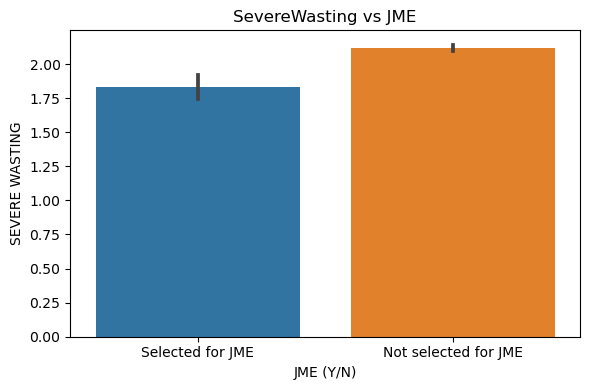

In [68]:
plt.figure(figsize=(6, 4))
sns.barplot(data = df, y ='SEVERE WASTING', x = 'JME (Y/N)')
plt.title('SevereWasting vs JME')
plt.tight_layout()
plt.show()

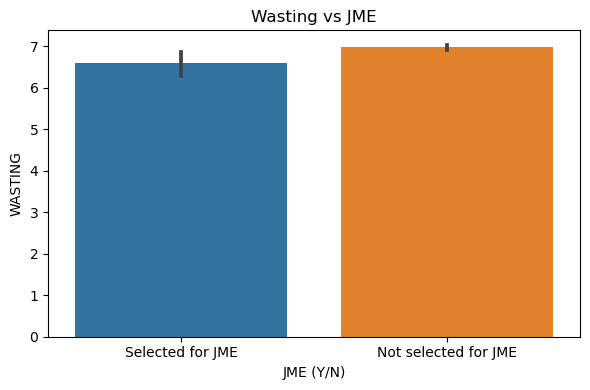

In [69]:
plt.figure(figsize=(6, 4))
sns.barplot(data = df, y ='WASTING', x = 'JME (Y/N)')
plt.title('Wasting vs JME')
plt.tight_layout()
plt.show()

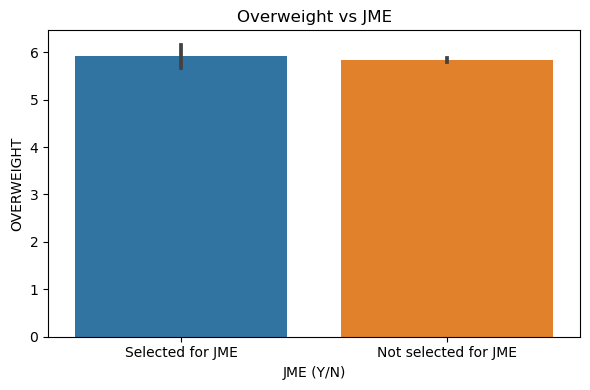

In [70]:
plt.figure(figsize=(6, 4))
sns.barplot(data = df, y ='OVERWEIGHT', x = 'JME (Y/N)')
plt.title('Overweight vs JME')
plt.tight_layout()
plt.show()

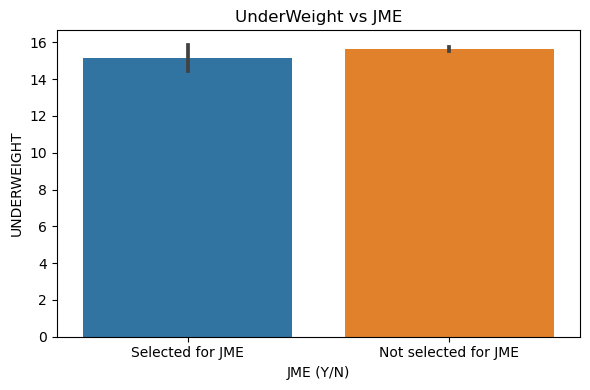

In [71]:
plt.figure(figsize=(6, 4))
sns.barplot(data = df, y ='UNDERWEIGHT', x = 'JME (Y/N)')
plt.title('UnderWeight vs JME')
plt.tight_layout()
plt.show()

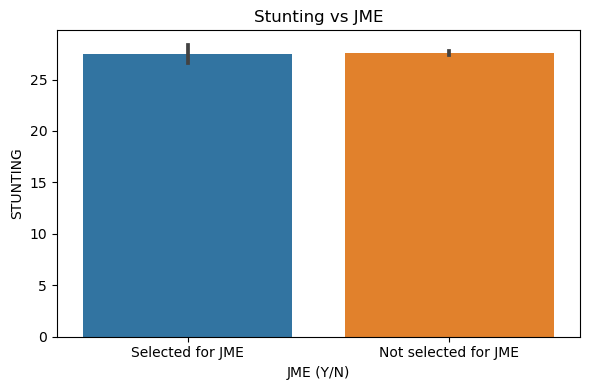

In [72]:
plt.figure(figsize=(6, 4))
sns.barplot(data = df, y ='STUNTING', x = 'JME (Y/N)')
plt.title('Stunting vs JME')
plt.tight_layout()
plt.show()

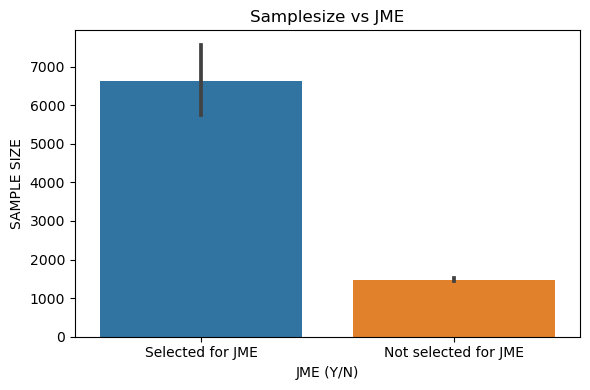

In [73]:
plt.figure(figsize=(6, 4))
sns.barplot(data = df, y ='SAMPLE SIZE', x = 'JME (Y/N)')
plt.title('Samplesize vs JME')
plt.tight_layout()
plt.show()

#### This sectoion is still about Bivariate Analysis, however, the relationship between the categorical variables and the target variable is examined. The statistical test is chi squrare while the cluster bar chart is used to visualize.

In [76]:
#Contingency table for chi-square test
contingency_table = pd.crosstab(df['SEX'], df['JME (Y/N)'])

# Chi-square test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-square statistic:", chi2)
print("p-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 731.6734113431636
p-value: 1.3156411514784937e-159
Degrees of freedom: 2
Expected frequencies:
 [[24083.6841328    683.31586719]
 [ 7711.21311314   218.78688686]
 [ 7715.10275405   218.89724595]]


In [77]:
#Contingency table for chi-square test
contingency_table = pd.crosstab(df['URBAN/RURAL'], df['JME (Y/N)'])

# Chi-square test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-square statistic:", chi2)
print("p-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 79.36266561572774
p-value: 5.84273416390174e-18
Degrees of freedom: 2
Expected frequencies:
 [[3.69652024e+04 1.04879757e+03]
 [1.38665699e+03 3.93430140e+01]
 [1.15814058e+03 3.28594177e+01]]


In [78]:
#Contingency table for chi-square test
contingency_table = pd.crosstab(df['AGE'], df['JME (Y/N)'])

# Chi-square test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-square statistic:", chi2)
print("p-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 1536.5045299494732
p-value: 2.003607661705581e-297
Degrees of freedom: 39
Expected frequencies:
 [[2.48839778e+03 7.06022249e+01]
 [2.91723069e+00 8.27693141e-02]
 [2.29099850e+03 6.50015013e+01]
 [3.11171273e+01 8.82872683e-01]
 [2.91723069e+00 8.27693141e-02]
 [5.83446137e+00 1.65538628e-01]
 [1.74119776e+04 4.94022446e+02]
 [8.56693411e+02 2.43065886e+01]
 [8.94617410e+01 2.53825896e+00]
 [7.77928183e+00 2.20718171e-01]
 [2.91723069e+00 8.27693141e-02]
 [2.65954198e+03 7.54580247e+01]
 [6.12618444e+01 1.73815560e+00]
 [9.72410229e-01 2.75897714e-02]
 [3.89936502e+02 1.10634983e+01]
 [2.02261328e+02 5.73867244e+00]
 [2.91723069e+00 8.27693141e-02]
 [2.91723069e+00 8.27693141e-02]
 [4.86205114e+00 1.37948857e-01]
 [2.68482464e+03 7.61753587e+01]
 [1.94482046e+00 5.51795427e-02]
 [5.83446137e+00 1.65538628e-01]
 [4.86205114e+00 1.37948857e-01]
 [1.94482046e+00 5.51795427e-02]
 [4.86205114e+00 1.37948857e-01]
 [9.72410229e-01 2.75897714e-02]
 [2.67607295e+03 7.5927

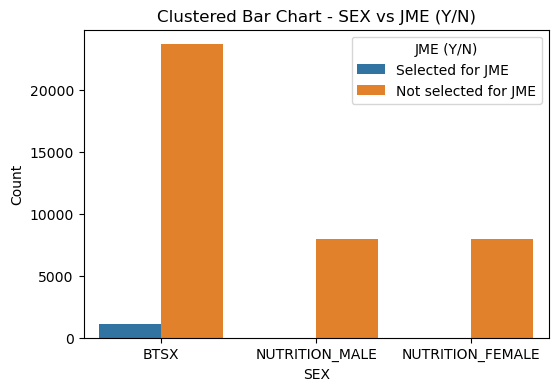

In [79]:
plt.figure(figsize=(6, 4))
sns.countplot(x='SEX', hue='JME (Y/N)', data=df)
plt.title('Clustered Bar Chart - SEX vs JME (Y/N)')
plt.xlabel('SEX')
plt.ylabel('Count')
plt.legend(title='JME (Y/N)')
plt.show()

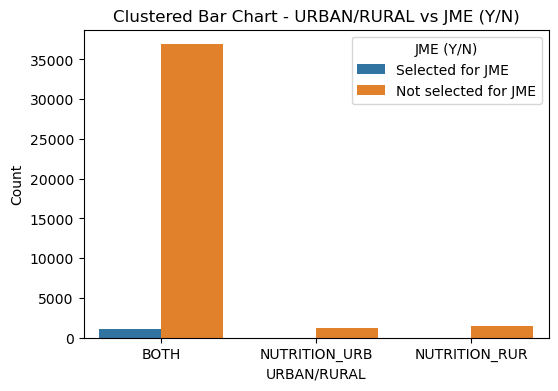

In [80]:
plt.figure(figsize=(6, 4))
sns.countplot(x='URBAN/RURAL', hue='JME (Y/N)', data=df)
plt.title('Clustered Bar Chart - URBAN/RURAL vs JME (Y/N)')
plt.xlabel('URBAN/RURAL')
plt.ylabel('Count')
plt.legend(title='JME (Y/N)')
plt.show()

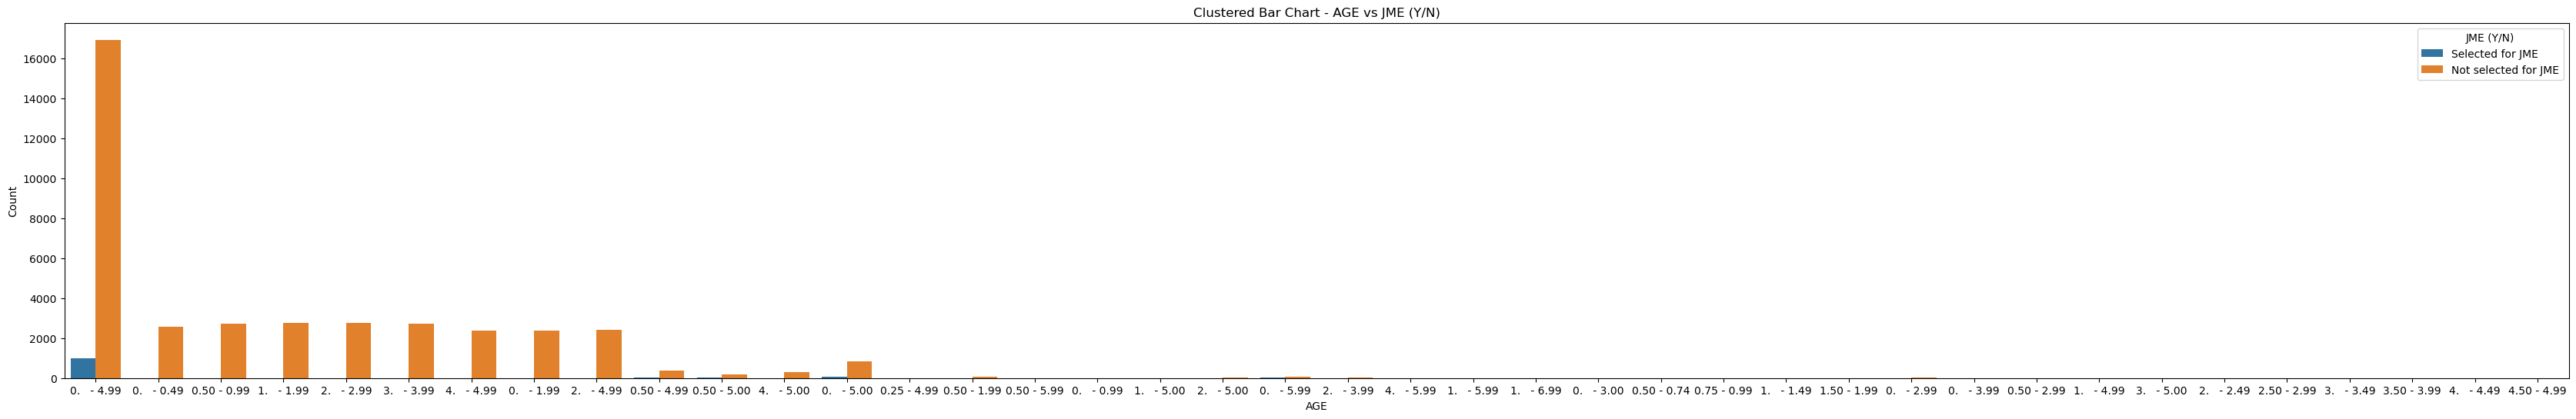

In [83]:
plt.figure(figsize=(42, 6))
sns.countplot(x='AGE', hue='JME (Y/N)', data=df)
plt.title('Clustered Bar Chart - AGE vs JME (Y/N)')
plt.xlabel('AGE')
plt.ylabel('Count')
plt.legend(title='JME (Y/N)')
plt.show()

###### This section looks at the Multivariate Analysis

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


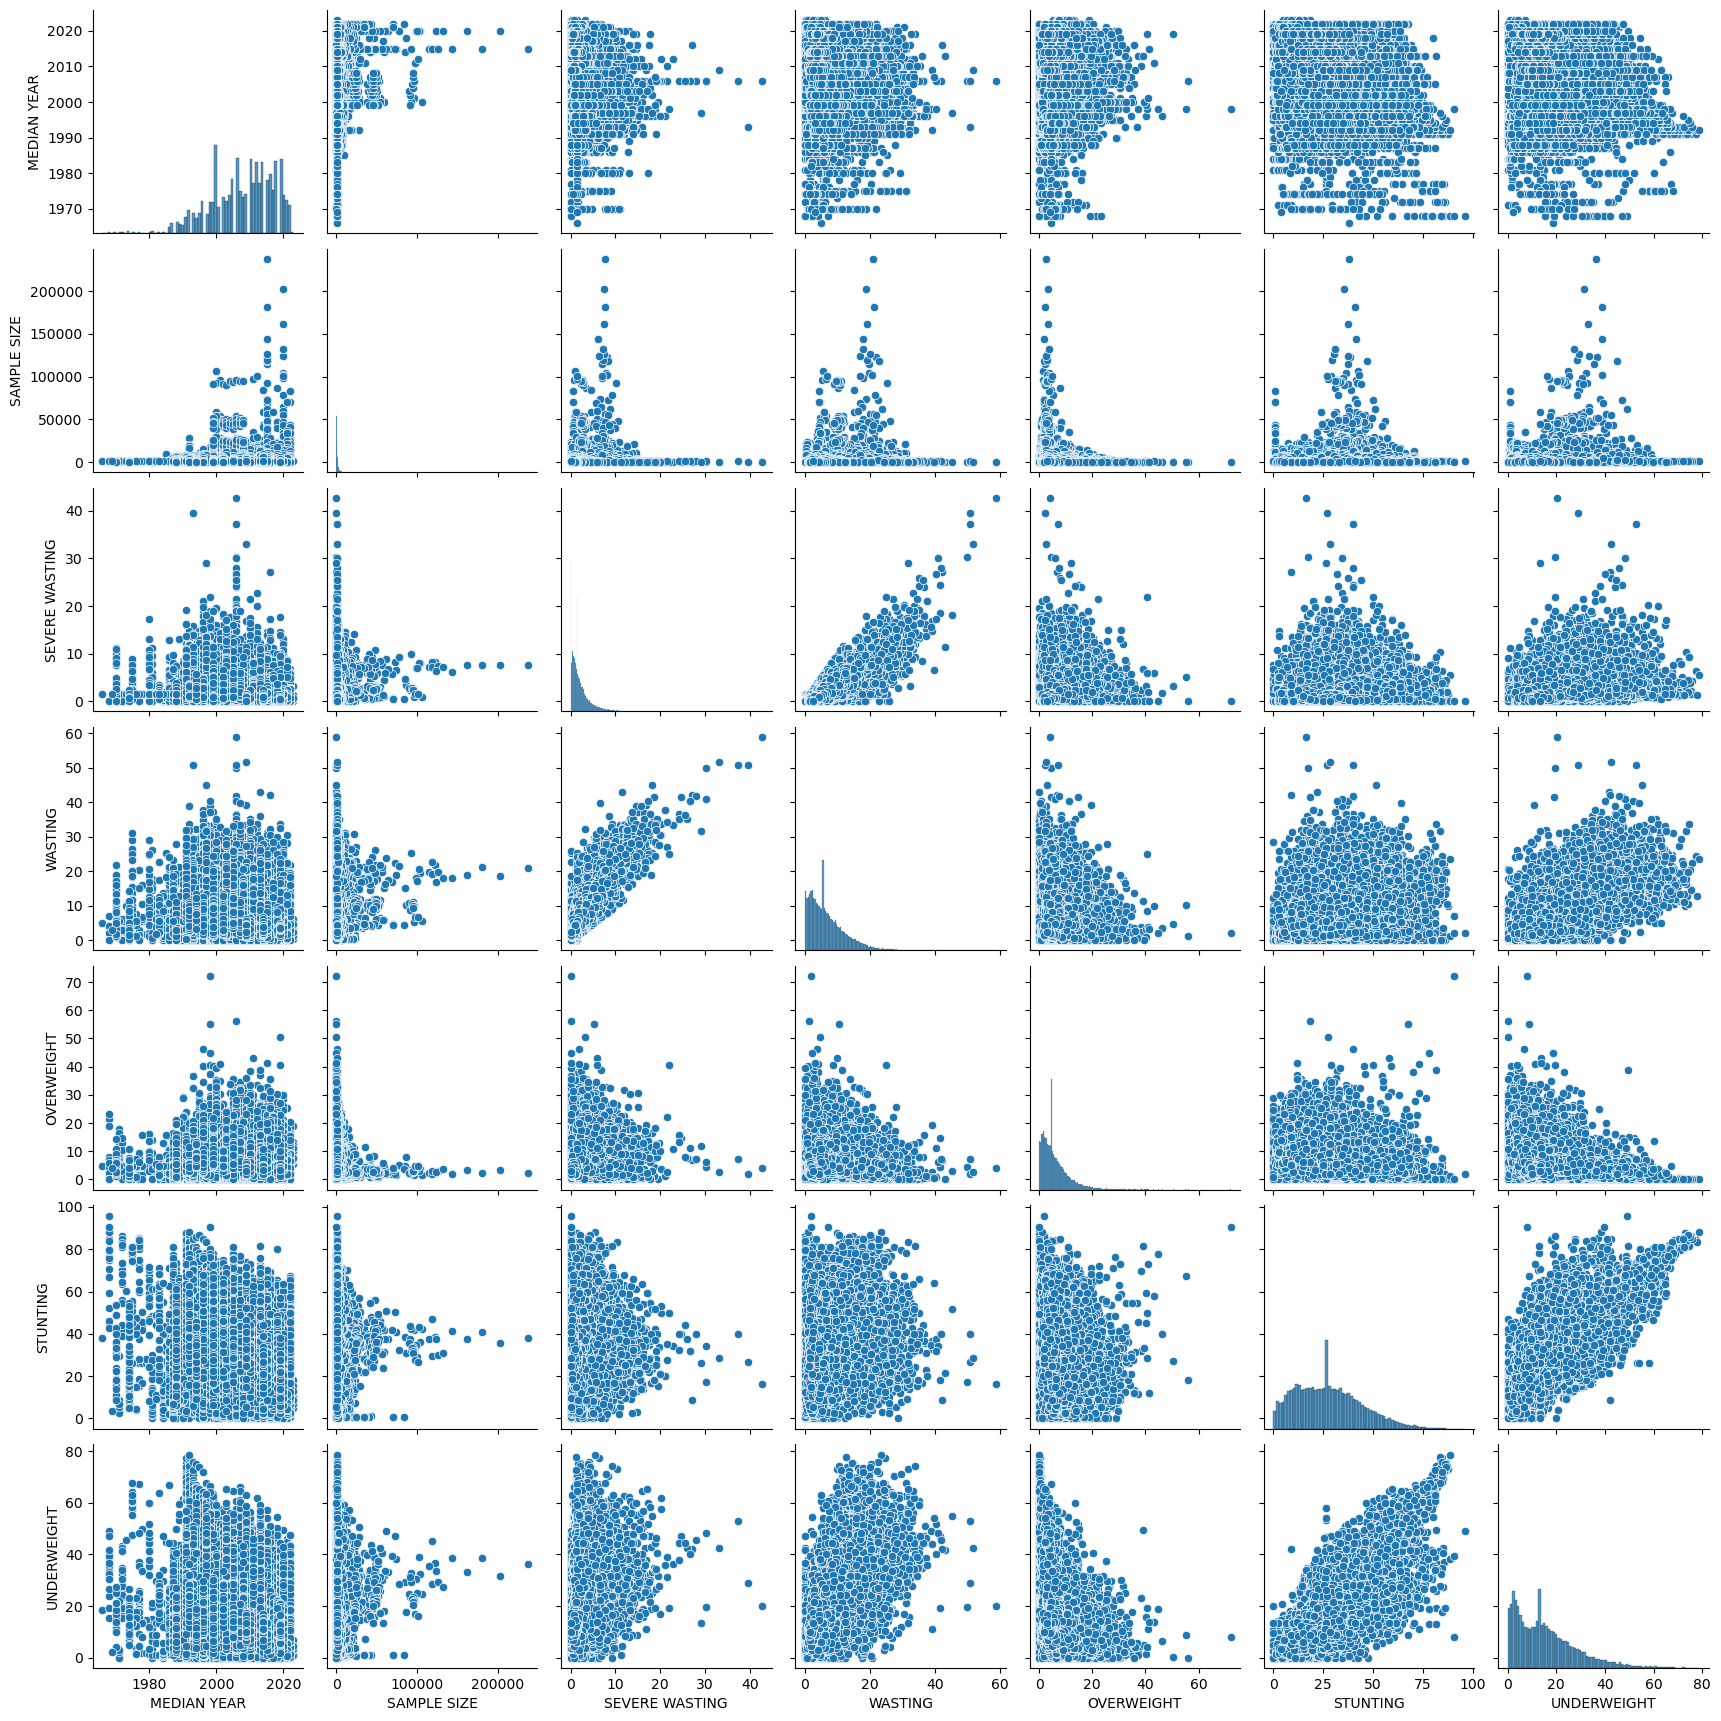

In [85]:
sns.pairplot(data = df)

In [88]:
my_df = df.select_dtypes(include = np.number)
my_df

,MEDIAN YEAR,SAMPLE SIZE,SEVERE WASTING,WASTING,OVERWEIGHT,STUNTING,UNDERWEIGHT
0,2022,32303.0,1.20261,3.63299,4.50092,44.60430,18.35824
1,2022,3178.0,2.52439,6.25841,14.13189,26.19436,14.19366
2,2022,3123.0,1.97696,6.63969,4.74012,24.18722,14.68663
3,2022,6072.0,1.33964,4.81251,3.29225,41.13941,17.18858
4,2022,6230.0,0.94883,2.98044,3.45675,54.68480,21.04723
...,...,...,...,...,...,...,...
40626,2009,711.0,0.71698,4.31156,2.89300,34.96618,16.41821
40627,2009,742.0,0.16778,2.13687,4.00260,37.78250,9.61627
40628,2009,555.0,0.94397,4.47851,1.74471,32.95322,14.55011
40629,2009,584.0,0.00000,1.57537,1.74470,28.37780,10.05157


<Axes: >

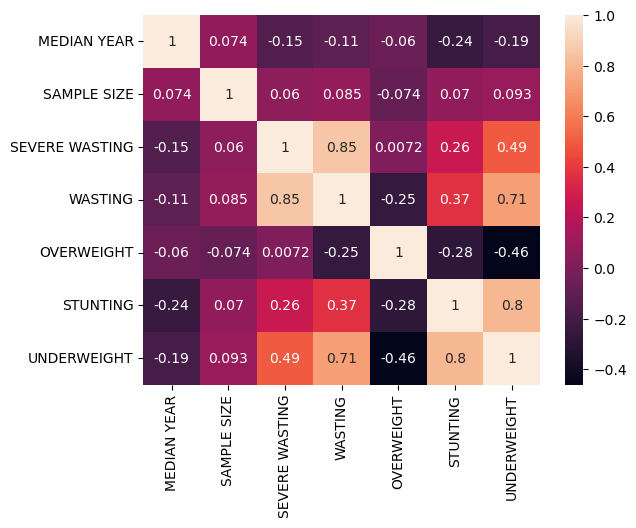

In [89]:
sns.heatmap(my_df.corr(), annot = True, cbar = True)

###### This section deals with Machine Learning 

In [90]:
from scipy.stats import norm, skew
from scipy import stats
import matplotlib.pyplot as plt

C:\Users\user\AppData\Local\Temp\ipykernel_9828\511897239.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


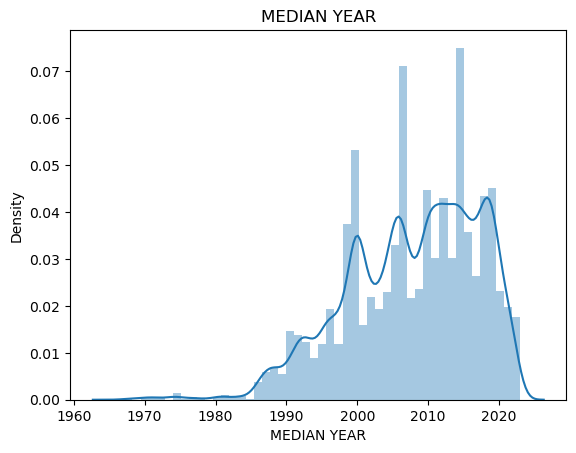

C:\Users\user\AppData\Local\Temp\ipykernel_9828\511897239.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


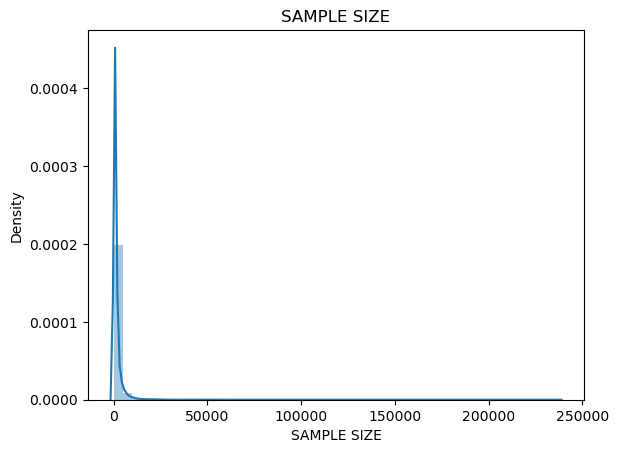

C:\Users\user\AppData\Local\Temp\ipykernel_9828\511897239.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


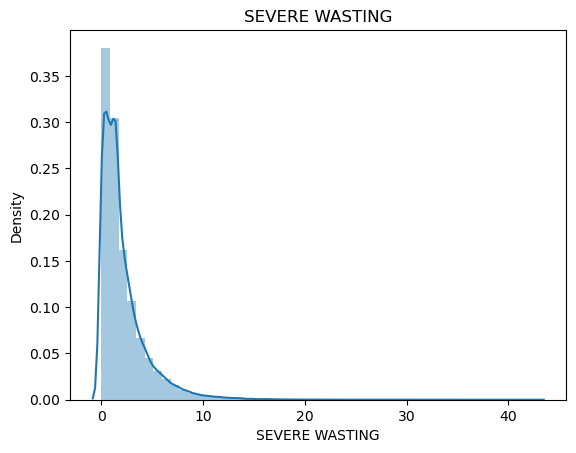

C:\Users\user\AppData\Local\Temp\ipykernel_9828\511897239.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


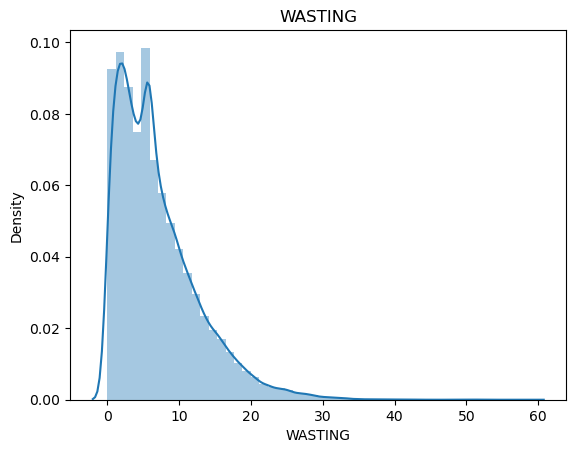

C:\Users\user\AppData\Local\Temp\ipykernel_9828\511897239.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


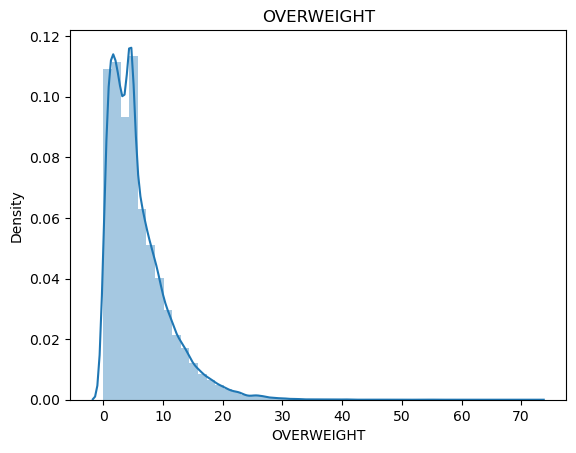

C:\Users\user\AppData\Local\Temp\ipykernel_9828\511897239.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


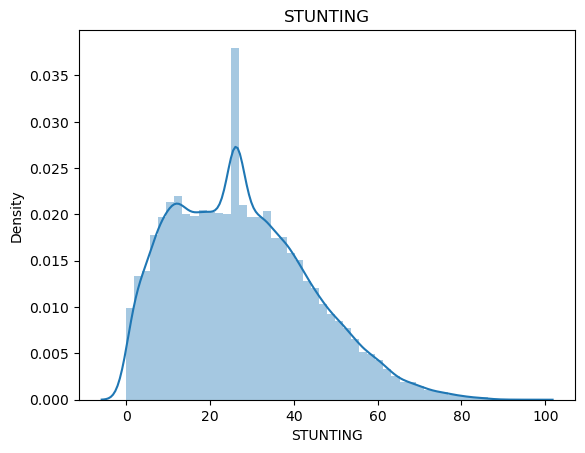

C:\Users\user\AppData\Local\Temp\ipykernel_9828\511897239.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


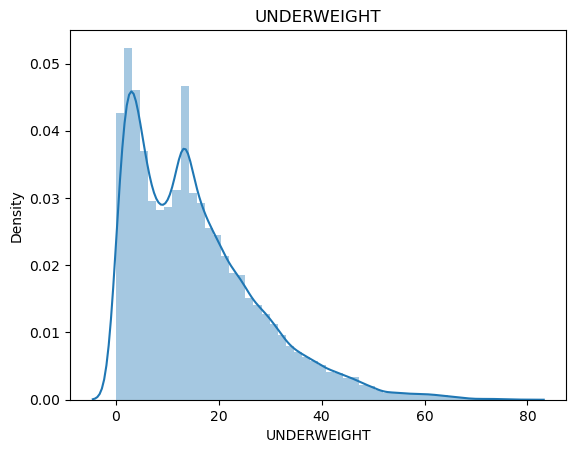

In [91]:
num_features = [num for num in df.columns if df[num].dtypes!='O' and df[num].dtypes != 'datetime64[ns]']

for features in num_features:
        sns.distplot(df[features])
        plt.title(features)
        plt.show()

In [92]:
for features in num_features:
    skew = df[features].skew()
    skew = round(skew, 2)
    print(features,skew)

MEDIAN YEAR -0.64
SAMPLE SIZE 18.22
SEVERE WASTING 2.87
WASTING 1.39
OVERWEIGHT 1.74
STUNTING 0.53
UNDERWEIGHT 1.13


In [ ]:
# On closer observation the sample size, severe wasting, wasting, over weight and under weight are not in the right skewness
# Next, is to bring them to proper skweness using the log transformation and pp plot to confirm the operation.

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


-0.5917368588516801

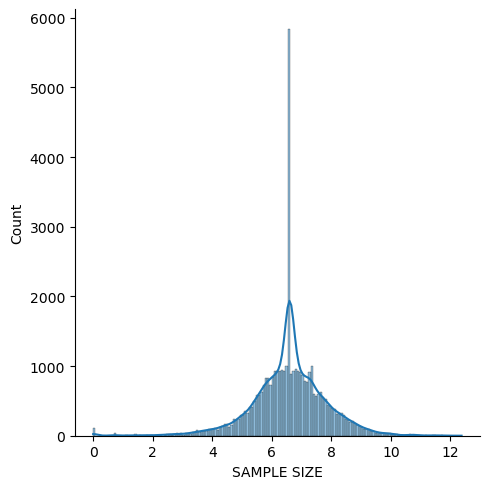

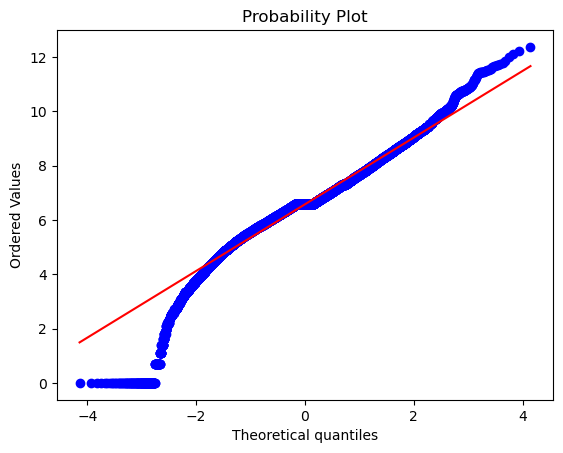

In [93]:
# To transform the Sample size column
df['SAMPLE SIZE'] = np.log1p(df['SAMPLE SIZE'])
sns.displot(df['SAMPLE SIZE'], kde = True)
fig = plt.figure()
res = stats.probplot(df['SAMPLE SIZE'], plot = plt)
df['SAMPLE SIZE'].skew()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


0.45791042792247827

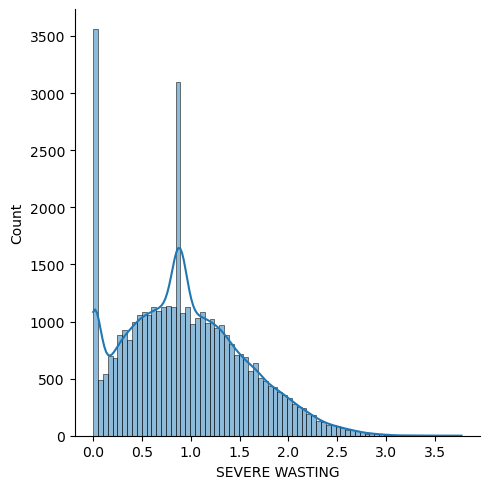

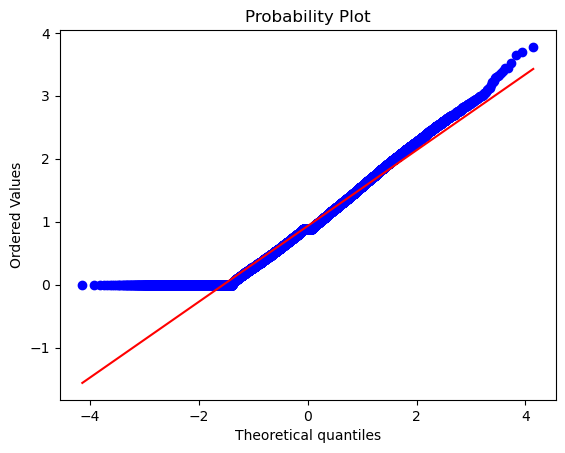

In [94]:
# To transform the Severe wasting column
df['SEVERE WASTING'] = np.log1p(df['SEVERE WASTING'])
sns.displot(df['SEVERE WASTING'], kde = True)
fig = plt.figure()
res = stats.probplot(df['SEVERE WASTING'], plot = plt)
df['SEVERE WASTING'].skew()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


-0.3482766843448548

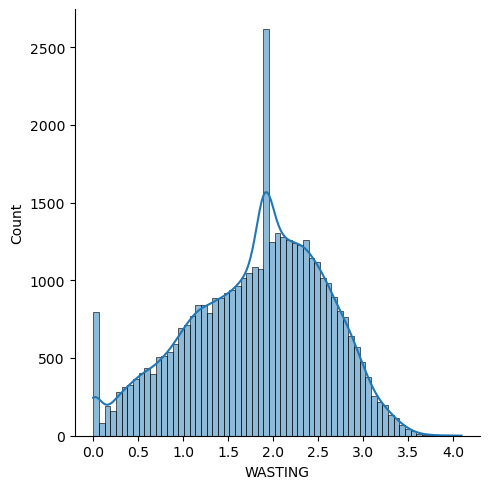

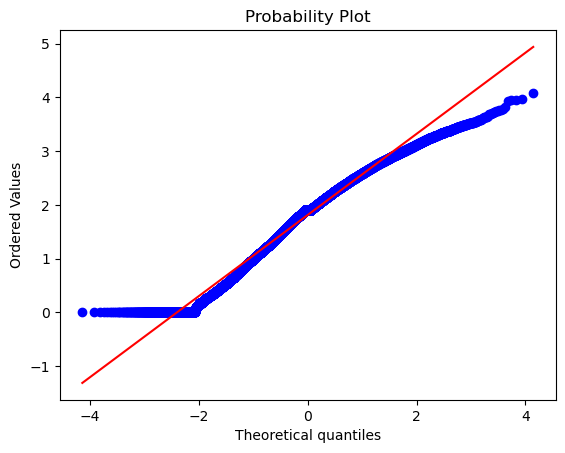

In [95]:
# To transform the Wasting column
df['WASTING'] = np.log1p(df['WASTING'])
sns.displot(df['WASTING'], kde = True)
fig = plt.figure()
res = stats.probplot(df['WASTING'], plot = plt)
df['WASTING'].skew()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


-0.16610636146037955

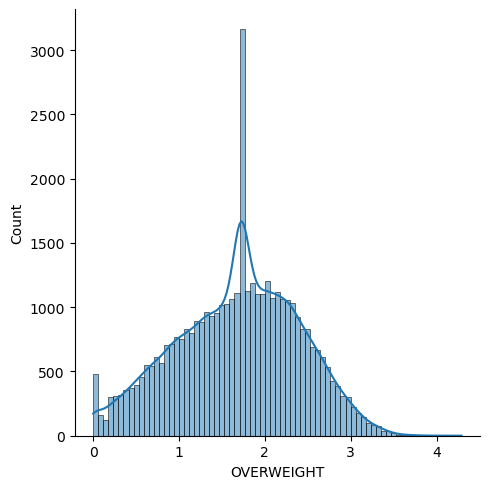

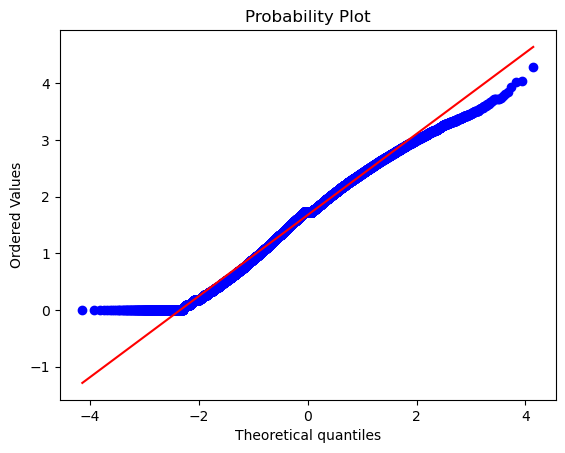

In [96]:
# To transform the Overweight column
df['OVERWEIGHT'] = np.log1p(df['OVERWEIGHT'])
sns.displot(df['OVERWEIGHT'], kde = True)
fig = plt.figure()
res = stats.probplot(df['OVERWEIGHT'], plot = plt)
df['OVERWEIGHT'].skew()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


-0.6223581099524674

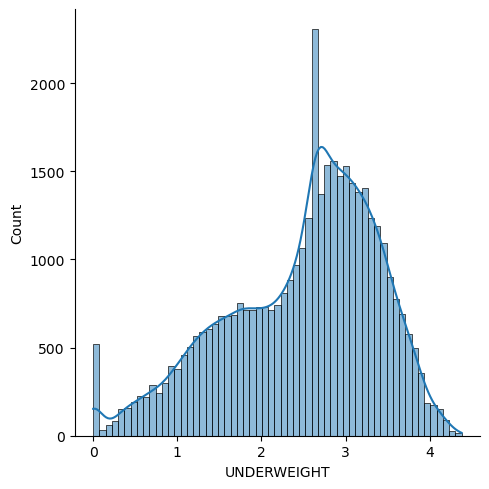

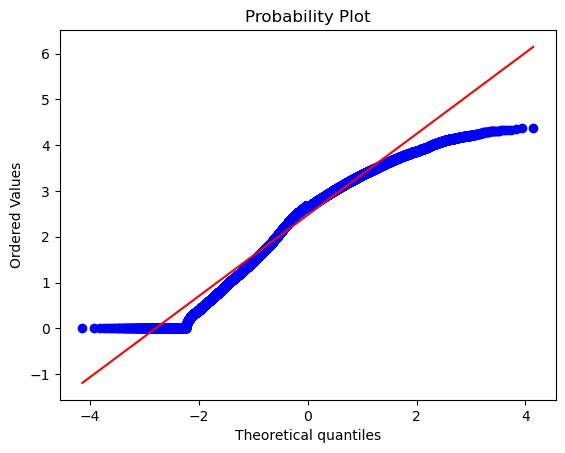

In [97]:
# To transform the Underweight column
df['UNDERWEIGHT'] = np.log1p(df['UNDERWEIGHT'])
sns.displot(df['UNDERWEIGHT'], kde = True)
fig = plt.figure()
res = stats.probplot(df['UNDERWEIGHT'], plot = plt)
df['UNDERWEIGHT'].skew()

In [98]:
list(df.columns)

['COUNTRY',
 'MEDIAN YEAR',
 'START MONTH',
 'END MONTH',
 'REGION',
 'AGE',
 'SEX',
 'URBAN/RURAL',
 'SAMPLE SIZE',
 'SEVERE WASTING',
 'WASTING',
 'OVERWEIGHT',
 'STUNTING',
 'UNDERWEIGHT',
 'SHORT SOURCE CODE',
 'AUTHOR',
 'NOTES',
 'JME (Y/N)']

In [100]:
# Based on statistical test and domain Knowledge vital features are selected as per feature engineering:
# Others are dropped:
df.drop(columns = ['COUNTRY', 'START MONTH', 'END MONTH', 'REGION', 'SHORT SOURCE CODE', 'AUTHOR', 'NOTES'], axis = 1, inplace = True)

In [102]:
# To check operation
df

,MEDIAN YEAR,AGE,SEX,URBAN/RURAL,SAMPLE SIZE,SEVERE WASTING,WASTING,OVERWEIGHT,STUNTING,UNDERWEIGHT,JME (Y/N)
0,2022,0. - 4.99,BTSX,BOTH,10.382946,0.789643,1.533202,1.704915,44.60430,2.963118,Selected for JME
1,2022,0. - 0.49,BTSX,BOTH,8.064322,1.259707,1.982161,2.716804,26.19436,2.720878,Not selected for JME
2,2022,0.50 - 0.99,BTSX,BOTH,8.046870,1.090903,2.033357,1.747480,24.18722,2.752809,Not selected for JME
3,2022,1. - 1.99,BTSX,BOTH,8.711608,0.849997,1.760012,1.456811,41.13941,2.900794,Not selected for JME
4,2022,2. - 2.99,BTSX,BOTH,8.737292,0.667229,1.381392,1.494420,54.68480,3.093187,Not selected for JME
...,...,...,...,...,...,...,...,...,...,...,...
40626,2009,0. - 4.99,BTSX,BOTH,6.568078,0.540567,1.669886,1.359180,34.96618,2.857516,Not selected for JME
40627,2009,0. - 4.99,BTSX,BOTH,6.610696,0.155105,1.143225,1.609958,37.78250,2.362388,Not selected for JME
40628,2009,0. - 4.99,BTSX,BOTH,6.320768,0.664732,1.700833,1.009675,32.95322,2.744068,Not selected for JME
40629,2009,0. - 4.99,BTSX,BOTH,6.371612,0.000000,0.945993,1.009672,28.37780,2.402572,Not selected for JME


In [103]:
# To seperate the input and target variables
x = df.drop('JME (Y/N)', axis = 1)
y = df[['JME (Y/N)']]

In [104]:
# To confirm the operation(split)
x.head(2)

,MEDIAN YEAR,AGE,SEX,URBAN/RURAL,SAMPLE SIZE,SEVERE WASTING,WASTING,OVERWEIGHT,STUNTING,UNDERWEIGHT
0,2022,0. - 4.99,BTSX,BOTH,10.382946,0.789643,1.533202,1.704915,44.60430,2.963118
1,2022,0. - 0.49,BTSX,BOTH,8.064322,1.259707,1.982161,2.716804,26.19436,2.720878


In [105]:
# To confirm the operation(split)
y.head(2)

,JME (Y/N)
0,Selected for JME
1,Not selected for JME


In [106]:
# To encode
x = pd.get_dummies(x,dtype = int)

In [107]:
# To confirm operation
x

,MEDIAN YEAR,SAMPLE SIZE,SEVERE WASTING,WASTING,OVERWEIGHT,STUNTING,UNDERWEIGHT,AGE_0. - 0.49,AGE_0. - 0.99,AGE_0. - 1.99,...,AGE_4. - 4.99,AGE_4. - 5.00,AGE_4. - 5.99,AGE_4.50 - 4.99,SEX_BTSX,SEX_NUTRITION_FEMALE,SEX_NUTRITION_MALE,URBAN/RURAL_BOTH,URBAN/RURAL_NUTRITION_RUR,URBAN/RURAL_NUTRITION_URB
0,2022,10.382946,0.789643,1.533202,1.704915,44.60430,2.963118,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,2022,8.064322,1.259707,1.982161,2.716804,26.19436,2.720878,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2022,8.046870,1.090903,2.033357,1.747480,24.18722,2.752809,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,2022,8.711608,0.849997,1.760012,1.456811,41.13941,2.900794,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,2022,8.737292,0.667229,1.381392,1.494420,54.68480,3.093187,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40626,2009,6.568078,0.540567,1.669886,1.359180,34.96618,2.857516,0,0,0,...,0,0,0,0,1,0,0,1,0,0
40627,2009,6.610696,0.155105,1.143225,1.609958,37.78250,2.362388,0,0,0,...,0,0,0,0,1,0,0,1,0,0
40628,2009,6.320768,0.664732,1.700833,1.009675,32.95322,2.744068,0,0,0,...,0,0,0,0,1,0,0,1,0,0
40629,2009,6.371612,0.000000,0.945993,1.009672,28.37780,2.402572,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [108]:
# Normalization otherwise known as scaling is done on x
# Bring in the library
from sklearn.preprocessing import MinMaxScaler

In [109]:
scaler = MinMaxScaler ()
scaled_features = [feature for feature in x.columns]
scaled_data = scaler.fit_transform(x)
x = pd.DataFrame(data = scaled_data, columns = scaled_features)
x

,MEDIAN YEAR,SAMPLE SIZE,SEVERE WASTING,WASTING,OVERWEIGHT,STUNTING,UNDERWEIGHT,AGE_0. - 0.49,AGE_0. - 0.99,AGE_0. - 1.99,...,AGE_4. - 4.99,AGE_4. - 5.00,AGE_4. - 5.99,AGE_4.50 - 4.99,SEX_BTSX,SEX_NUTRITION_FEMALE,SEX_NUTRITION_MALE,URBAN/RURAL_BOTH,URBAN/RURAL_NUTRITION_RUR,URBAN/RURAL_NUTRITION_URB
0,0.982456,0.838912,0.209118,0.374872,0.397374,0.465113,0.676778,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.982456,0.651574,0.333604,0.484643,0.633220,0.273142,0.621451,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.982456,0.650164,0.288900,0.497161,0.407294,0.252213,0.628744,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.982456,0.703873,0.225102,0.430328,0.339547,0.428982,0.662543,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.982456,0.705948,0.176700,0.337754,0.348312,0.570227,0.706486,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40626,0.754386,0.530682,0.143157,0.408291,0.316791,0.364611,0.652659,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
40627,0.754386,0.534125,0.041076,0.279522,0.375241,0.393978,0.539571,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
40628,0.754386,0.510700,0.176039,0.415858,0.235330,0.343621,0.626747,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
40629,0.754386,0.514808,0.000000,0.231298,0.235330,0.295910,0.548749,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [111]:
# Next is to split the dataset into Train and Test set
# Bring in the library
from sklearn.model_selection import train_test_split

In [112]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [113]:
# The display of the train_split
x_train

,MEDIAN YEAR,SAMPLE SIZE,SEVERE WASTING,WASTING,OVERWEIGHT,STUNTING,UNDERWEIGHT,AGE_0. - 0.49,AGE_0. - 0.99,AGE_0. - 1.99,...,AGE_4. - 4.99,AGE_4. - 5.00,AGE_4. - 5.99,AGE_4.50 - 4.99,SEX_BTSX,SEX_NUTRITION_FEMALE,SEX_NUTRITION_MALE,URBAN/RURAL_BOTH,URBAN/RURAL_NUTRITION_RUR,URBAN/RURAL_NUTRITION_URB
15215,0.508772,0.314448,0.000000,0.384329,0.647934,0.120968,0.226816,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
92,0.824561,0.804732,0.425373,0.575719,0.430518,0.421413,0.740998,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
23676,0.561404,0.435421,0.758195,0.826997,0.506832,0.399252,0.746782,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
21891,0.947368,0.715223,0.244132,0.515253,0.157490,0.265238,0.645296,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3915,0.701754,0.340924,0.000000,0.215492,0.585543,0.214441,0.423991,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.912281,0.574721,0.149386,0.399881,0.557997,0.403322,0.631212,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11284,0.929825,0.477575,0.216321,0.513541,0.242062,0.179077,0.585784,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
38158,0.631579,0.810301,0.333936,0.546560,0.271877,0.424237,0.703279,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
860,0.877193,0.544614,0.256492,0.391168,0.639791,0.113200,0.330434,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [114]:
# The display of the train_split
y_train

,JME (Y/N)
15215,Not selected for JME
92,Selected for JME
23676,Not selected for JME
21891,Not selected for JME
3915,Not selected for JME
...,...
6265,Not selected for JME
11284,Not selected for JME
38158,Not selected for JME
860,Not selected for JME


In [115]:
# Next, is to do cross validation -(Hyperparameter tuning)
# This is to select the best fit classification model for the task
# Bring in the libraries
from sklearn.model_selection import cross_val_score, StratifiedKFold,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np
random_seed = 42
np.random.seed(random_seed)

In [116]:
# Create a list of models to evaluate
models = [('RandomForest', RandomForestClassifier()),
          ('LogisticsRegression', LogisticRegression()),
          ('DecisionTree', DecisionTreeClassifier())]

In [117]:
# Next, cross validation is performed to evaluate model
results = []
for name,model in models:
    kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=random_seed)
    cv_scores = cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
    results.append((name,cv_scores.mean(),cv_scores.std()))

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exa

In [118]:
for name, mean_score, std_score in results:
    print(f'{name}: Mean Accurracy = {mean_score:.4f}, std = {std_score:.4f}')

RandomForest: Mean Accurracy = 0.9778, std = 0.0005
LogisticsRegression: Mean Accurracy = 0.9735, std = 0.0006
DecisionTree: Mean Accurracy = 0.9693, std = 0.0020


In [119]:
# Next is to train and test the data
model = RandomForestClassifier()
model.fit(x_train, y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [120]:
# on seen data
model.score(x_train,y_train)

1.0

In [121]:
# on unseen data
model.score(x_test,y_test)

0.977728559123908

In [122]:
y_test

,JME (Y/N)
35906,Not selected for JME
26774,Not selected for JME
38974,Not selected for JME
18844,Not selected for JME
20070,Not selected for JME
...,...
18772,Not selected for JME
31407,Not selected for JME
28924,Not selected for JME
7893,Not selected for JME


In [123]:
# When x_test is predicted by the model to produce y_test
y_pred = model.predict(x_test)
print(y_pred)

['Not selected for JME' 'Not selected for JME' 'Not selected for JME' ...
 'Not selected for JME' 'Not selected for JME' 'Not selected for JME']


#####  This section deals with Model Evaluation.  Accuracy Score, Classification Report and Classification Matrix are examined

In [127]:
# Accuracy Score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9777


In [128]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                      precision    recall  f1-score   support

Not selected for JME       0.98      1.00      0.99      7896
    Selected for JME       0.77      0.31      0.44       231

            accuracy                           0.98      8127
           macro avg       0.87      0.65      0.72      8127
        weighted avg       0.97      0.98      0.97      8127



In [129]:
# Classification Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[7874   22]
 [ 159   72]]
